# ML Nb. 15. Metrics for Evaluation
***

### Compiled by Amit Purswani
LinkedIn: https://www.linkedin.com/in/amit-purswani-2a073777/
***

<b>GitHub Repositories</b>
1. Data Analysis:
https://github.com/kranemetal/Data-Analysis-Projects

2. Machine Learning:
https://github.com/kranemetal/MachineLearning
***

# <center> Evaluation Metrics for Regression </center>

- For regression, we generally use Ordinary Least Squares method i.e. sum of squares of differences between actual and predicted values should be least, this means least error. <br>
### SS<sub>res</sub> = SUM (y<sub>i</sub>-ŷ<sub>i</sub>)<sup>2</sup> should be minimum. <br>
- It is also called Sum of <b>Squares of Residuals</b> SS<sub>res</sub>
- The line with the smallest Sum is the Best Fitting line and will be used for Linear Regression Model predictions.

 ### <center> Line of Best fit and Line of Average in Regression</center>
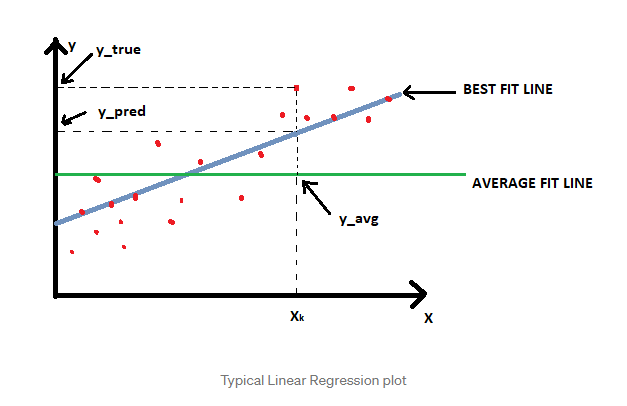
Image Credit: Puja P. Pathak (medium)

 ### <center> Line of Best fit and Residuals</center>
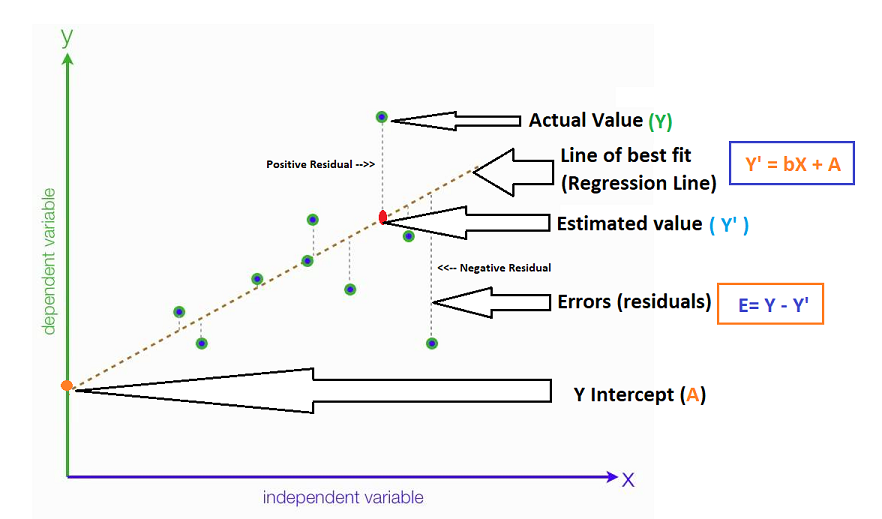
Image Credit: Bhuvaneswari Gopalan (NumpyNinja)

 ### <center> Calculation of Total Sum of Squares</center>
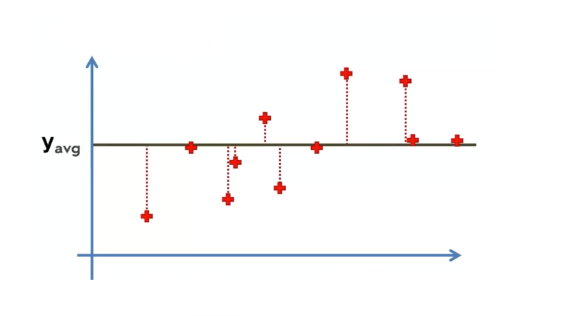
### SS<sub>tot</sub> = SUM (y<sub>i</sub>-y<sub>avg</sub>)<sup>2</sup> 
<b>Total Sum of Squares</b> is the sum of squares of differences between y and y(average).<br>
The red markings are actual values of y, the perpendicular dotted lines are the differences betwen actual and average value of y.<br><br>
Image Credit: Ligency (Superdtascience)

## 1. Metric R<sup>2</sup> (R-Squared)

### R<sup>2</sup> = 1 - (SS<sub>res</sub> / SS<sub>tot</sub>)

- Line of Best Fit has Residual Sum of Squares, Line of Average Fit has Total Sum of Squares.
- R<sup>2</sup> tells us how good our Line of Fit is, as compared to an average fit line.
- 0 < R<sup>2</sup> < 1 is the range of R<sup>2</sup>
- In worst case R<sup>2</sup> is negative
- Ideally R<sup>2</sup> should be as close to 1 as possible
- It shows Goodness of Fit (greater is better)
- The R-squared, also called the <b>coefficient of determination</b>, is used to explain the degree to which input variables (predictor variables) explain the variation of output variables (predicted variables).
- For example, if the R-squared is 0.9, it indicates that 90% of the variation in the output variables are explained by the input variables.
- Generally speaking, a higher R-squared indicates a better fit for the model.
- Sometimes R-squared value is negative, when the data on best fit line fits worse than the data on average line.

### <b>Issue with R<sup>2</sup></b>
-    Suppose we have a 2 features in a linear regression model, and we have a certain value of R<sup>2</sup>.
-    Further if we add a thrid feature in our model, then irrespective of whether that feature improved our model or not the R<sup>2</sup> will not decrease.
-    Hence, R<sup>2</sup> is not a totally robust & reliant way to measure the goodness.
-   Therefore, we would further see something called as Adjusted R<sup>2</sup>.

## 2. Metric Adjusted R<sup>2

### Adjusted R<sup>2</sup> = 1 - (1 - R<sup>2</sup>)(n - 1 / n - p - 1)
where,<br>
p - no. of predictors/features <br>
n - no. of samples/rows in dataset (sample size)

- Adjusted R<sup>2</sup> has a penalization factor.
- It penalizes the features that don't help to improve the model.
- Adding a new feature will increase R<sup>2</sup> but if it's helping the model, penalizing factor will decrease else increase.
- Hence the formula of Adjusted R<sup>2</sup> responds well to adding new features, it increases with good features and decreases with irrelevant features.


### R-squared (also called R2 score)
__Note__: y_test and y_pred figures are just for example, to demonstrate the calculations

In [27]:
print(y_test)

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
Name: Salary, dtype: float64


In [28]:
print(y_pred)

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [29]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, y_pred)
print(R2_score)

0.9740993407213511


### Adjusted R2 score

In [30]:
#display adjusted R-squared
R2_adj = 1 - ((1-R2_score)*(len(y)-1)/(len(y)-x.shape[1]-1))
print(R2_adj)

0.973174317175685


***

***

# <center> Evaluation Metrics for Classification </center>

### False Positives and False Negatives
- False Positives: We predicted an effect but it did not occur in reality. Type I Error. (less serious)
- False Negatives: We didn't predict but it did occur in reality. Type II Error. (more serious)

### Confusion Matrix
By definition a confusion matrix __C__ is such that __C<sub>ij</sub>__ is equal to the number of observations known to be in group __i__ and predicted to be in group __j__ .<br>
Thus in binary classification, the count of true negatives is __C<sub>00</sub>__ , false negatives is __C<sub>10</sub>__, true positives is __C<sub>11</sub>__ and false positives is __C<sub>01</sub>__ .

Confusion Matrix
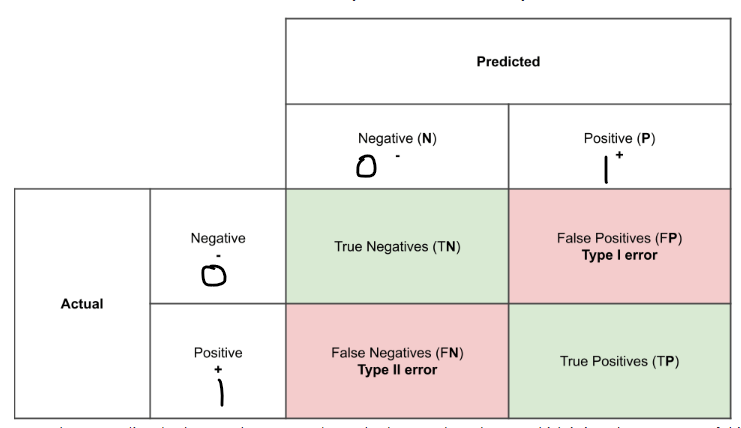
Image Credit: nbshare.io

__Accuracy__
- How many values did we predict correctly? How many true predictions out of all samples there are?
- Accuracy = Correct Predictions / All Samples
- Accuracy = TP + TN / (TN + FN + TP + FP)

__Precision__
- Precision calculates percentage of how many times a prediction is correct out of total predictions made.
- Precision = TP / (TP + FP)
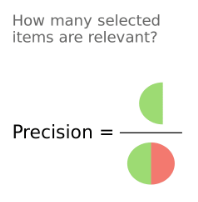

__Recall__
- Recall - Out of all actual positive samples, how many did you detect?
- Recall = TP / (TP + FN)
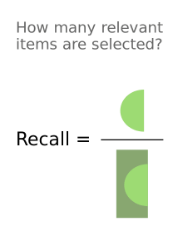

__F1 Score__
- In order to unify precision and recall into one measure, we take their harmonic mean, which is called F1-score
- F1-score = 2  *  (Precision * Recall) / (Precision + Recall)

### Checking the confusion matrix, accuracy, precision, recall, f1-score

### Confusion Matrix
__Note:__ Figures are for Example only, just to demonstrate the Calculations.

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) #confusion matrix(actual, predicted)
print(cm)

[[70  9]
 [ 4 37]]


### Accuracy

In [36]:
# Accuracy using built-in function
accuracy_score(y_test, y_pred) #accuracy score (actual, predicted)

0.8916666666666667

In [46]:
# Accuracy manual verification
accuracy = (37+70)/(70+37+9+4)
print(accuracy)

0.8916666666666667


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

### Precision

In [39]:
# Precision using built-in function
precision_score(y_test, y_pred)

0.8043478260869565

In [40]:
# Precision manual verification
precision = 37/(37+9)
print(precision)

0.8043478260869565


### Recall

In [41]:
# Recall using built-in function
recall_score(y_test, y_pred)

0.9024390243902439

In [42]:
# Recall manual verification
recall = 37/(37+4)
print(recall)

0.9024390243902439


### F1 score

In [43]:
# F1 score using built-in function
f1_score(y_test, y_pred)

0.8505747126436782

In [44]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f1)

0.8505747126436782


### Cumulative Accuracy Profile

Let us understand CAP - Cumulative Accuracy Profile with an example


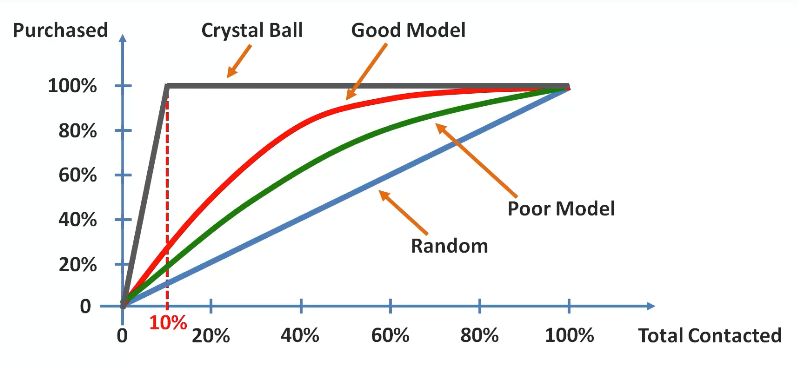

Image Credit: Ligency(superdatascience team)

- For example, if a departmental store has a response rate of 10% i.e. for every 10 persons contacted one of them will make a purchase.
- So approximately for every set of people contacted 10% of total is going to make a purchase.
- We now plot the no. of customers called as a percentage of total customer base (X-axis) and also the plot the no. of purchases made as percentage of customers called (Y-axis).
- To increase our accuracy of calling customers, i.e. to call those specific customers which are highly likely to make a purchase, we build different models.
- Each model has different accuracy as below:
> Blue line is random model i.e. 10% of conversion rate as expected<br>
> Green line represents a model which is a better but not so great model<br>
> Red line is for a pretty good model<br>
> Black line is an ideal model for prediction i.e. calling only those 10% customers who are surely going to make a purchase<br>
> Note: if a model causes line to plotted below blue line here, that should not be considered it is worst performance
- This is known as Cumulative Accuracy Profile

### CAP Curve Analysis

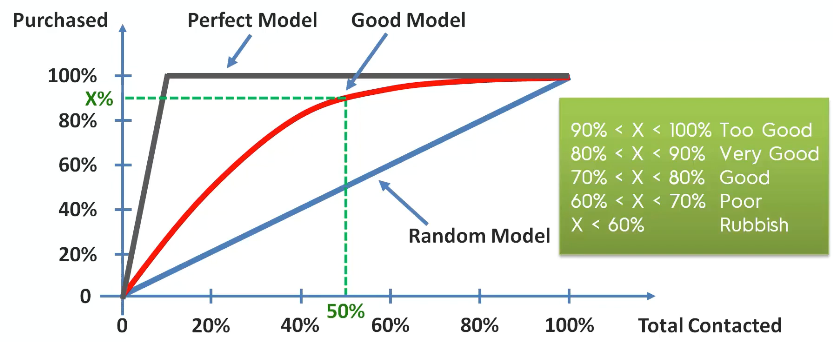

A simple way to measure the performance of a model is pick 50% on X-axis and see how much we get corresponsding value 'X%' on Y-axis, below are suggested measures for performance
- X < 60% -Discard it
- 60% < X < 70% -Poor Model
- 70% < X < 80% -Good Model
- 80% < X < 90% -Very good Model
- 90% < X < 100% -Too good a Model (high chances of overfitting)

***

### <center>The End